In [170]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uasstatistikacintia/Jan_2019_ontime.csv


In [171]:
import warnings

warnings.filterwarnings('ignore')

In [172]:
#mengimport dataset

df = pd.read_csv("../input/uasstatistikacintia/Jan_2019_ontime.csv")
df.shape

(583985, 19)

In [173]:
df.head() #digunakan untuk menampilkan record pertama dari dataframe

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,2,9E,20363,9E,N8688C,3280,11953,GNV,10397,ATL,601.0,0.0,0600-0659,722.0,0.0,0,0,300
1,1,2,9E,20363,9E,N348PQ,3281,13487,MSP,11193,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0,0,596
2,1,2,9E,20363,9E,N8896A,3282,11433,DTW,11193,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0,0,229
3,1,2,9E,20363,9E,N8886A,3283,15249,TLH,10397,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0,0,223
4,1,2,9E,20363,9E,N8974C,3284,10397,ATL,11778,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0,0,579


In [174]:
df.tail() #digunakan untuk menampilkan data paling bawah

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
583980,31,4,UA,19977,UA,N776UA,200,12016,GUM,12173,HNL,749.0,0.0,0700-0759,1832.0,0.0,0,0,3801
583981,31,4,UA,19977,UA,N36280,174,12016,GUM,14955,SPN,717.0,0.0,0700-0759,759.0,0.0,0,0,129
583982,31,4,UA,19977,UA,N36280,117,14955,SPN,12016,GUM,857.0,0.0,0900-0959,933.0,0.0,0,0,129
583983,31,4,UA,19977,UA,N39726,105,14955,SPN,12016,GUM,1820.0,0.0,1800-1859,1854.0,0.0,0,0,129
583984,31,4,UA,19977,UA,N39726,104,12016,GUM,14955,SPN,1636.0,0.0,1600-1659,1719.0,0.0,0,0,129


In [175]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           583985 non-null  int64  
 1   DAY_OF_WEEK            583985 non-null  int64  
 2   OP_UNIQUE_CARRIER      583985 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  583985 non-null  int64  
 4   OP_CARRIER             583985 non-null  object 
 5   TAIL_NUM               581442 non-null  object 
 6   OP_CARRIER_FL_NUM      583985 non-null  int64  
 7   ORIGIN_AIRPORT_ID      583985 non-null  int64  
 8   ORIGIN                 583985 non-null  object 
 9   DEST_AIRPORT_ID        583985 non-null  int64  
 10  DEST                   583985 non-null  object 
 11  DEP_TIME               567633 non-null  float64
 12  DEP_DEL15              567630 non-null  float64
 13  DEP_TIME_BLK           583985 non-null  object 
 14  ARR_TIME               566924 non-nu

In [176]:
df.columns #daftar nama kolom

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN', 'DEST_AIRPORT_ID', 'DEST', 'DEP_TIME',
       'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15', 'CANCELLED',
       'DIVERTED', 'DISTANCE'],
      dtype='object')

In [177]:
df.isnull().sum() #mendeteksi keberadaan nilai kosong

DAY_OF_MONTH                 0
DAY_OF_WEEK                  0
OP_UNIQUE_CARRIER            0
OP_CARRIER_AIRLINE_ID        0
OP_CARRIER                   0
TAIL_NUM                  2543
OP_CARRIER_FL_NUM            0
ORIGIN_AIRPORT_ID            0
ORIGIN                       0
DEST_AIRPORT_ID              0
DEST                         0
DEP_TIME                 16352
DEP_DEL15                16355
DEP_TIME_BLK                 0
ARR_TIME                 17061
ARR_DEL15                18022
CANCELLED                    0
DIVERTED                     0
DISTANCE                     0
dtype: int64

In [178]:
#menghapus kolom yang tidak digunakan
df = df.drop(columns=['DAY_OF_MONTH','OP_UNIQUE_CARRIER','OP_CARRIER','TAIL_NUM',
                           'OP_CARRIER_AIRLINE_ID','OP_CARRIER_FL_NUM','ORIGIN','DEST',
                           'DEP_DEL15','DEP_TIME_BLK','ARR_TIME','CANCELLED','DIVERTED','DISTANCE'])
data = df.head(350)
data.head()

,DAY_OF_WEEK,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_TIME,ARR_DEL15
0,2,11953,10397,601.0,0.0
1,2,13487,11193,1359.0,0.0
2,2,11433,11193,1215.0,0.0
3,2,15249,10397,1521.0,0.0
4,2,10397,11778,1847.0,0.0


In [179]:
X = data.iloc[:, :4].values
Y = data.iloc[:, 4].values

In [180]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])
X[:, 1] = le.fit_transform(X[:, 1])

In [181]:
# membagi dataset menjadi data training dan data testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

print(x_test)

[[0.0000e+00 4.9000e+01 1.0397e+04 1.5530e+03]
 [0.0000e+00 4.9000e+01 1.0397e+04 7.2700e+02]
 [0.0000e+00 2.0000e+01 1.3204e+04 9.1700e+02]
 [0.0000e+00 4.0000e+00 1.0599e+04 8.5400e+02]
 [0.0000e+00 7.7000e+01 1.3930e+04 5.5200e+02]
 [0.0000e+00 1.7000e+01 1.0397e+04 1.4150e+03]
 [0.0000e+00 5.1000e+01 1.0821e+04 1.6090e+03]
 [0.0000e+00 2.3000e+01 1.0397e+04 1.2020e+03]
 [0.0000e+00 2.5000e+01 1.3487e+04 6.5100e+02]
 [0.0000e+00 2.0000e+01 1.3487e+04 1.3000e+03]
 [0.0000e+00 7.4000e+01 1.2478e+04 1.5580e+03]
 [0.0000e+00 6.8000e+01 1.3485e+04 1.3250e+03]
 [0.0000e+00 2.8000e+01 1.4831e+04 1.8380e+03]
 [0.0000e+00 9.9000e+01 1.0397e+04 1.3300e+03]
 [0.0000e+00 4.0000e+00 1.1953e+04 2.2190e+03]
 [0.0000e+00 4.0000e+00 1.1146e+04 1.0540e+03]
 [0.0000e+00 8.0000e+01 1.0721e+04 9.1900e+02]
 [0.0000e+00 7.2000e+01 1.2892e+04 2.3310e+03]
 [0.0000e+00 6.8000e+01 1.2339e+04 9.5600e+02]
 [0.0000e+00 6.4000e+01 1.0693e+04 1.5270e+03]
 [0.0000e+00 8.9000e+01 1.1298e+04 8.0300e+02]
 [0.0000e+00 

In [182]:
#Feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

print(x_train)

[[ 0.          0.99511432 -0.61382215 -0.48309389]
 [ 0.          0.75158528  1.29130642  0.66068783]
 [ 0.          0.75158528 -0.47443908 -1.13507202]
 ...
 [ 0.         -1.33580648  0.01102195 -0.6929    ]
 [ 0.         -0.43127005 -1.20127078 -0.21914426]
 [ 0.          0.36889679 -0.5220333  -1.61108374]]


In [183]:
#Model training
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [184]:
y_pred = classifier.predict(x_test)

print(y_pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [185]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score: 0.9286


In [186]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score: 0.9286


In [187]:
#Cek nilai akurasi
from sklearn.metrics import confusion_matrix,accuracy_score

ac = accuracy_score(y_test, y_pred)
ac

0.9285714285714286

In [188]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[65  0]
 [ 5  0]]

True Positives(TP) =  65

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  5


<AxesSubplot:>

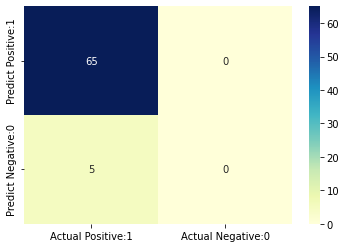

In [189]:
#Classification matrix
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [191]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [192]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9286


In [193]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0714


In [194]:
precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 1.0000


In [195]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9286
